#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/precio-portatiles-the-bridge/overview

## Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
import seaborn as sns

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df=pd.read_csv('data/train.csv')
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [3]:
df['Memory'].unique()

array(['1TB HDD', '256GB SSD', '256GB SSD +  1TB HDD',
       '512GB SSD +  2TB HDD', '128GB SSD +  1TB HDD', '128GB SSD',
       '1TB SSD', '64GB Flash Storage', '2TB HDD', '500GB HDD',
       '1.0TB Hybrid', '16GB Flash Storage', '256GB Flash Storage',
       '180GB SSD', '32GB Flash Storage', '512GB SSD',
       '512GB SSD +  1TB HDD', '256GB SSD +  500GB HDD',
       '256GB SSD +  2TB HDD', '1TB SSD +  1TB HDD', '64GB SSD',
       '128GB Flash Storage', '256GB SSD +  1.0TB Hybrid', '32GB SSD',
       '512GB Flash Storage', '240GB SSD', '256GB SSD +  256GB SSD',
       '16GB SSD', '8GB SSD', '64GB Flash Storage +  1TB HDD',
       '1.0TB HDD', '1TB HDD +  1TB HDD', '512GB SSD +  512GB SSD',
       '128GB SSD +  2TB HDD', '32GB HDD', '512GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [229]:
# df.describe(include='all')

In [3]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [4]:
df['OpSys'][df['OpSys']=='Windows 10 S']='Windows 10'
df['OpSys'][df['OpSys']=='Mac OS X']='macOS'

C:\Users\Agui\AppData\Local\Temp\ipykernel_10856\2094320187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys'][df['OpSys']=='Windows 10 S']='Windows 10'
C:\Users\Agui\AppData\Local\Temp\ipykernel_10856\2094320187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys'][df['OpSys']=='Mac OS X']='macOS'


In [111]:
df['OpSys'].unique()

array(['Windows 10', 'Windows 7', 'Linux', 'Chrome OS', 'No OS', 'macOS',
       'Android'], dtype=object)

In [5]:
df = pd.concat([df, pd.get_dummies(df['OpSys'], prefix='OpSys')], axis=1)

df = df.drop('OpSys', axis=1)

In [6]:
matches = df['Memory'].str.extractall(r'(\d+)\s?([GT]B)').reset_index()
matches.columns = ['level_0', 'match', 'Capacity', 'Unit']

matches['Total_GB'] = matches['Capacity'].astype(float) * matches['Unit'].replace({'GB': 1, 'TB': 1000}).fillna(1)

df['Total_GB'] = matches.groupby('level_0')['Total_GB'].sum()

df['Storage_Type'] = df['Memory'].str.extract(r'(SSD|HDD)')


In [7]:
df[['Memory','Total_GB','Storage_Type']].head()

,Memory,Total_GB,Storage_Type
0,1TB HDD,1000.0,HDD
1,1TB HDD,1000.0,HDD
2,256GB SSD,256.0,SSD
3,256GB SSD + 1TB HDD,1256.0,SSD
4,256GB SSD,256.0,SSD


In [34]:
df.drop(columns='Memory',inplace=True)

In [35]:
df['Storage_Type'].nunique()

2

In [8]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

le.fit(df['Storage_Type'])
df['Storage_type_Enc']= le.transform(df['Storage_Type'])
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,OpSys_macOS,Total_GB,Storage_Type,Storage_type_Enc
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,...,False,False,False,False,True,False,False,1000.0,HDD,0
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,...,False,False,False,False,True,False,False,1000.0,HDD,0
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,...,False,False,False,False,False,True,False,256.0,SSD,1
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,...,False,False,False,False,True,False,False,1256.0,SSD,1
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,...,False,False,False,False,False,True,False,256.0,SSD,1


In [9]:
df.drop(columns='Storage_Type',inplace=True)

In [10]:
df = pd.concat([df, pd.get_dummies(df['Company'], prefix='Company')], axis=1)

df = df.drop('Company', axis=1)

In [11]:
df.drop(columns='Product',inplace=True)

In [40]:
df.head()

,id,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price_euros,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,268,1002,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,AMD Radeon R7 M445,2.36,749.00,...,False,False,False,False,False,False,False,False,False,False
1,347,867,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,Intel HD Graphics 505,2.00,449.00,...,False,False,False,False,False,False,False,False,False,False
2,353,966,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,Intel HD Graphics 520,1.20,1460.00,...,False,False,False,False,False,False,False,True,False,False
3,578,767,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1070,4.42,2868.99,...,False,False,False,False,False,False,False,False,False,False
4,42,1241,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,Intel HD Graphics 520,1.26,1713.37,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df = pd.concat([df, pd.get_dummies(df['TypeName'], prefix='TypeName')], axis=1)

df = df.drop('TypeName', axis=1)

In [13]:
df['ResolutionHeight'] = df['ScreenResolution'].str.extract(r'\d+x(\d+)')
# df.head()

In [14]:
df = df.drop('ScreenResolution', axis=1)

In [99]:
# df['Product'].nunique()
# df['ScreenResolution'].unique()
df['Cpu'].nunique()
# df['Ram'].unique() #replace
# df['Memory'].unique()
# df['Gpu'].unique()
# df['OpSys'].unique()
# df['Weight'].unique() #replace
# df['Company'].unique()
# len(df)

104

In [102]:
# df['Cpu'].unique()

In [15]:
df['CPU_Type'] = df['Cpu'].str.extract(r'(\bIntel\b|\bAMD\b|\bCore\s[^\d]+)')
df['Speed_GHz'] = df['Cpu'].str.extract(r'(\d+\.\d+)GHz')

In [16]:
df[['Cpu','CPU_Type','Speed_GHz']]
# df[df['CPU_Type'].notnull()]

,Cpu,CPU_Type,Speed_GHz
0,Intel Core i7 7500U 2.7GHz,Intel,2.7
1,Intel Pentium Quad Core N4200 1.1GHz,Intel,1.1
2,Intel Core i5 6200U 2.3GHz,Intel,2.3
3,Intel Core i7 7700HQ 2.8GHz,Intel,2.8
4,Intel Core i5 6300U 2.4GHz,Intel,2.4
...,...,...,...
907,Intel Celeron Dual Core N3060 1.6GHz,Intel,1.6
908,Intel Core i5 6200U 2.3GHz,Intel,2.3
909,AMD A8-Series 7410 2.2GHz,AMD,2.2
910,Intel Core i7 7600U 2.8GHz,Intel,2.8


In [17]:
df = df.drop('Cpu', axis=1)

In [127]:
df.head()

,id,laptop_ID,Inches,Ram,Gpu,Weight,Price_euros,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,...,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ResolutionHeight,CPU_Type,Speed_GHz
0,268,1002,15.6,8,AMD Radeon R7 M445,2.36,749.00,False,False,False,...,False,False,False,False,True,False,False,768,Intel,2.7
1,347,867,15.6,4,Intel HD Graphics 505,2.00,449.00,False,False,False,...,False,False,False,False,True,False,False,768,Intel,1.1
2,353,966,13.3,8,Intel HD Graphics 520,1.20,1460.00,False,False,False,...,False,False,False,False,True,False,False,1080,Intel,2.3
3,578,767,15.6,16,Nvidia GeForce GTX 1070,4.42,2868.99,False,False,False,...,False,False,True,False,False,False,False,2160,Intel,2.8
4,42,1241,12.5,8,Intel HD Graphics 520,1.26,1713.37,False,False,False,...,False,False,False,False,False,True,False,1080,Intel,2.4


## Data exploration

In [134]:
df.columns

Index(['id', 'Ram', 'Gpu', 'Weight', 'Price_euros', 'OpSys_Android',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 7', 'OpSys_macOS', 'Total_GB', 'Storage_type_Enc',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'ResolutionHeight', 'CPU_Type', 'Speed_GHz'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           912 non-null    int64  
 1   Ram                          912 non-null    int32  
 2   Weight                       912 non-null    float64
 3   Price_euros                  912 non-null    float64
 4   OpSys_Android                912 non-null    bool   
 5   OpSys_Chrome OS              912 non-null    bool   
 6   OpSys_Linux                  912 non-null    bool   
 7   OpSys_No OS                  912 non-null    bool   
 8   OpSys_Windows 10             912 non-null    bool   
 9   OpSys_Windows 7              912 non-null    bool   
 10  OpSys_macOS                  912 non-null    bool   
 11  Total_GB                     912 non-null    float64
 12  Storage_type_Enc             912 non-null    int32  
 13  Company_Acer        

In [18]:
df = pd.get_dummies(df, columns=['CPU_Type'], prefix='CPU_Type')


In [19]:
df['ResolutionHeight']=df['ResolutionHeight'].astype(int)
df['Speed_GHz']=df['Speed_GHz'].astype(float)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           912 non-null    int64  
 1   Ram                          912 non-null    int32  
 2   Weight                       912 non-null    float64
 3   Price_euros                  912 non-null    float64
 4   OpSys_Android                912 non-null    bool   
 5   OpSys_Chrome OS              912 non-null    bool   
 6   OpSys_Linux                  912 non-null    bool   
 7   OpSys_No OS                  912 non-null    bool   
 8   OpSys_Windows 10             912 non-null    bool   
 9   OpSys_Windows 7              912 non-null    bool   
 10  OpSys_macOS                  912 non-null    bool   
 11  Total_GB                     912 non-null    float64
 12  Storage_type_Enc             912 non-null    int32  
 13  Company_Acer        

In [150]:
df.columns

Index(['id', 'Ram', 'Weight', 'Price_euros', 'OpSys_Android',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 7', 'OpSys_macOS', 'Total_GB', 'Storage_type_Enc',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'ResolutionHeight', 'Speed_GHz', 'CPU_Type_AMD', 'CPU_Type_Intel'],
      dtype='object')

In [20]:
#TRY
df.drop(columns='Gpu',inplace=True)

In [21]:
df.drop(columns='laptop_ID',inplace=True)

In [22]:
df.drop(columns='Inches',inplace=True)

In [41]:
# sns.pairplot(df.drop(columns=['id','laptop_ID']))

In [77]:
# df.head()
# df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)

<Axes: >

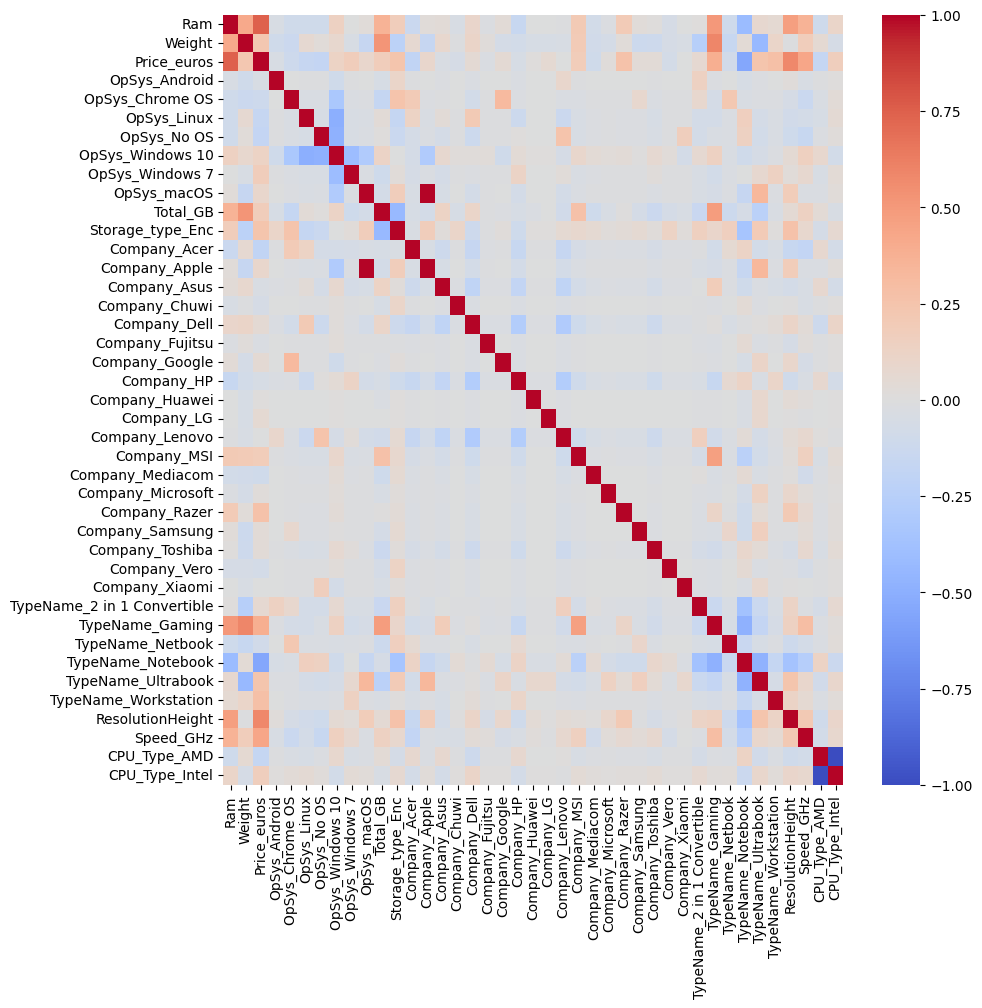

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns=['id']).corr(),cmap='coolwarm',vmin=-1,vmax=1,)

## Data processing

In [23]:
df[df.isnull()]
df.fillna(0, inplace=True)

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [36]:
X=df.drop(columns=['Price_euros','id'])
y=df['Price_euros']

Old

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ram                          912 non-null    int32  
 1   Weight                       912 non-null    float64
 2   OpSys_Android                912 non-null    bool   
 3   OpSys_Chrome OS              912 non-null    bool   
 4   OpSys_Linux                  912 non-null    bool   
 5   OpSys_No OS                  912 non-null    bool   
 6   OpSys_Windows 10             912 non-null    bool   
 7   OpSys_Windows 7              912 non-null    bool   
 8   OpSys_macOS                  912 non-null    bool   
 9   Total_GB                     912 non-null    float64
 10  Storage_type_Enc             912 non-null    int32  
 11  Company_Acer                 912 non-null    bool   
 12  Company_Apple                912 non-null    bool   
 13  Company_Asus        

In [37]:
X.head()

,Ram,Weight,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,OpSys_macOS,Total_GB,...,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ResolutionHeight,Speed_GHz,CPU_Type_AMD,CPU_Type_Intel
0,8,2.36,False,False,False,False,True,False,False,1000.0,...,False,False,False,True,False,False,768,2.7,False,True
1,4,2.00,False,False,False,False,True,False,False,1000.0,...,False,False,False,True,False,False,768,1.1,False,True
2,8,1.20,False,False,False,False,False,True,False,256.0,...,False,False,False,True,False,False,1080,2.3,False,True
3,16,4.42,False,False,False,False,True,False,False,1256.0,...,False,True,False,False,False,False,2160,2.8,False,True
4,8,1.26,False,False,False,False,False,True,False,256.0,...,False,False,False,False,True,False,1080,2.4,False,True


### 2. Dividir X_train, X_test, y_train, y_test

In [25]:
#REPEATING FOR TEST.CSV
test=pd.read_csv('data/test.csv')
test['Ram']=test['Ram'].str.replace('GB','').astype(int)
test['Weight']=test['Weight'].str.replace('kg','').astype(float)
test['OpSys'][test['OpSys']=='Windows 10 S']='Windows 10'
test['OpSys'][test['OpSys']=='Mac OS X']='macOS'
test = pd.concat([test, pd.get_dummies(test['OpSys'], prefix='OpSys')], axis=1)

test = test.drop('OpSys', axis=1)
matches2 = test['Memory'].str.extractall(r'(\d+)\s?([GT]B)').reset_index()
matches2.columns = ['level_0', 'match', 'Capacity', 'Unit']

matches2['Total_GB'] = matches2['Capacity'].astype(float) * matches2['Unit'].replace({'GB': 1, 'TB': 1000}).fillna(1)

test['Total_GB'] = matches2.groupby('level_0')['Total_GB'].sum()

test['Storage_Type'] = test['Memory'].str.extract(r'(SSD|HDD)')

le.fit(test['Storage_Type'])
test['Storage_type_Enc']= le.transform(test['Storage_Type'])

test = pd.concat([test, pd.get_dummies(test['Company'], prefix='Company')], axis=1)
test = test.drop('Company', axis=1)

test = pd.concat([test, pd.get_dummies(test['TypeName'], prefix='TypeName')], axis=1)
test = test.drop('TypeName', axis=1)

test['ResolutionHeight'] = test['ScreenResolution'].str.extract(r'\d+x(\d+)')
# test.head()

test['CPU_Type'] = test['Cpu'].str.extract(r'(\bIntel\b|\bAMD\b|\bCore\s[^\d]+)')
test['Speed_GHz'] = test['Cpu'].str.extract(r'(\d+\.\d+)GHz')

test = pd.get_dummies(test, columns=['CPU_Type'], prefix='CPU_Type')

test['ResolutionHeight']=test['ResolutionHeight'].astype(int)
test['Speed_GHz']=test['Speed_GHz'].astype(float)

test.fillna(0, inplace=True)

C:\Users\Agui\AppData\Local\Temp\ipykernel_10856\1807178382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['OpSys'][test['OpSys']=='Windows 10 S']='Windows 10'
C:\Users\Agui\AppData\Local\Temp\ipykernel_10856\1807178382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['OpSys'][test['OpSys']=='Mac OS X']='macOS'


In [26]:
test.drop(columns=['Memory','Storage_Type','Product','ScreenResolution','Cpu','laptop_ID','Inches','Gpu'],inplace=True)

In [27]:
test.columns
new_columns=['OpSys_Android','Company_Fujitsu','Company_Mediacom']
test[new_columns] = 0

In [28]:
desired_column_order = ['id', 'Ram', 'Weight', 'OpSys_Android',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 7', 'OpSys_macOS', 'Total_GB', 'Storage_type_Enc',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'ResolutionHeight', 'Speed_GHz', 'CPU_Type_AMD', 'CPU_Type_Intel']

test = test[desired_column_order]

In [32]:
test.shape

(391, 41)

In [96]:
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [29]:
Xtt=test.drop(columns=['id'])

Prueba de escalar solo no dummies

In [35]:
X.columns

Index(['Ram', 'Memory', 'Weight', 'OpSys_Android', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7',
       'OpSys_macOS', 'Total_GB', 'Storage_type_Enc', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'ResolutionHeight', 'Speed_GHz', 'CPU_Type_AMD', 'CPU_Type_Intel'],
      dtype='object')

In [43]:
X_scaled=X.copy()
Xtt_scaled=Xtt.copy()

In [40]:
columnas_escalar=['Ram','Weight','Total_GB','Storage_type_Enc','ResolutionHeight','Speed_GHz']

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler() #coloca los valores entre 0 y 1

In [44]:
X_scaled[columnas_escalar] = scaler.fit_transform(X[columnas_escalar])
Xtt_scaled[columnas_escalar] = scaler.transform(Xtt[columnas_escalar])

In [ ]:
# xtt_scale=scaler.transform(Xtt)

### 3. Crear y entrenar el modelo


In [45]:
lr = linear_model.LinearRegression()

lr.fit(X_scaled, y)

LinearRegression()

In [51]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 0.6579332246575675)
ridgeR.fit(X_scaled, y)

predictions_train = ridgeR.predict(Xtt_scaled)
# mean_absolute_error(y,predictions_train) 

In [52]:
predictions_train

array([2472.34265083,  617.1228638 ,  340.16870333, 1470.50831071,
       1022.24488839, 1692.61521735, 2639.63492092,  519.8939546 ,
       4914.57946081, 1440.57062869, 1435.87589177,  600.70685804,
        409.77934469,  467.25933206,  457.51789968, 1101.73653652,
        893.7920941 , 1492.76205091, 1240.92990329, 1397.52016307,
       1687.48026414, 1238.09473202, 1495.46345566, 1218.46818761,
       1781.71969295,  794.8422597 ,  881.20848566,  401.14116405,
       1226.72850163,  294.64181769, 1251.27257028, 1121.71734483,
       1812.15078905,  524.92811389,  588.75161178, 1791.62704612,
        918.23751202,  809.51658341, 2975.61728213,  526.08248701,
        711.07740297,  865.67202912, 1277.25966166, 1874.56711402,
       1269.09952406, 1442.87351877,  478.51272615, 2986.47469136,
        225.93608333, 1792.63345596, 1002.96165729, 1002.8823033 ,
        968.96344245,  328.71315111, 1209.22969306,  639.94044937,
        724.11368555,  430.5197139 ,  921.51075555, 1351.97353

In [84]:
# from sklearn.linear_model import Ridge

# ridgeR = Ridge(alpha = 0.6579332246575675)
# ridgeR.fit(X, y)

# predictions_ri=ridgeR.predict(X)

In [289]:
# mean_absolute_error(y,predictions_ri) 

243.55075783112702

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [267]:
X_test.shape
# y_test.shape

(183, 40)

In [103]:
test.head()

,id,Ram,Weight,OpSys_Chrome OS,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,OpSys_macOS,Total_GB,...,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ResolutionHeight,Speed_GHz,CPU_Type_AMD,CPU_Type_Intel,OpSys_Android,Company_Fujitsu,Company_Mediacom
0,181,16,1.30,False,False,False,True,False,False,512.0,...,False,True,False,2160,2.7,False,True,0,0,0
1,708,8,2.20,False,False,False,True,False,False,256.0,...,True,False,False,768,2.7,True,False,0,0,0
2,862,4,2.40,False,True,False,False,False,False,500.0,...,True,False,False,768,2.0,False,True,0,0,0
3,1064,8,1.43,False,False,False,False,True,False,256.0,...,True,False,False,1080,2.3,False,True,0,0,0
4,702,8,1.34,False,False,False,True,False,False,256.0,...,True,False,False,1080,2.5,False,True,0,0,0


In [44]:
y_predT = lr.predict(xtt_scale)
# print("Train MAE:", metrics.mean_absolute_error(predictions_train, lr.predict(xtt_scale)))
# print(lr.score(Xtt,y_predT))

-----------------------------------------------------------------

In [45]:
ridgeR.fit(xtt_scale,y_predT)


Ridge(alpha=0.6579332246575675)

In [46]:
predictions_test=ridgeR.predict(xtt_scale)

In [51]:
y_predT

array([ 2.47193750e+03,  6.28093750e+02,  3.38593750e+02,  1.48662500e+03,
        1.02993750e+03,  1.71459375e+03,  2.72846875e+03,  5.10921875e+02,
        5.04384375e+03,  1.43939062e+03,  1.42935938e+03,  5.96734375e+02,
        3.40578125e+02,  4.69531250e+02,  4.45781250e+02,  1.10910938e+03,
        8.93171875e+02,  1.49168750e+03,  1.24467188e+03,  1.38982812e+03,
        1.67501562e+03,  1.24068750e+03,  1.51621875e+03,  1.21410938e+03,
        1.78376562e+03,  6.61875000e+02,  8.81765625e+02,  3.98125000e+02,
        1.20804688e+03,  2.90546875e+02,  1.25226562e+03,  1.12554688e+03,
        1.82279688e+03,  5.28421875e+02,  5.77359375e+02,  1.79337500e+03,
        9.24781250e+02,  8.12890625e+02,  3.01271875e+03,  5.30125000e+02,
        7.02906250e+02,  8.76000000e+02,  1.27131250e+03,  1.88334375e+03,
        1.25564062e+03,  1.35851562e+03,  4.66265625e+02,  3.02320312e+03,
        2.19921875e+02,  1.77735938e+03,  1.00954688e+03,  1.00129688e+03,
        9.75453125e+02,  

In [47]:
predictions_test

array([-7.40486789e+10, -4.49390773e+10,  5.65545091e+10, -4.77247458e+10,
        4.17473734e+10,  4.56956769e+09, -3.19223457e+10, -9.32346512e+10,
        4.13842136e+11, -1.31737854e+11,  7.03774732e+10,  8.97737211e+10,
       -5.75141248e+10, -4.26430293e+10, -2.52852930e+10, -6.52893608e+10,
       -3.60448007e+10, -1.05208150e+11, -5.93696107e+10,  7.70571312e+10,
        3.71596350e+10, -1.11366024e+11,  8.22399110e+10,  3.12936923e+10,
        1.52420191e+10, -1.11198193e+11,  2.20094354e+10, -1.11092198e+11,
       -4.77797003e+10,  5.73101823e+10, -1.57274259e+11, -5.50988022e+10,
        3.99742504e+10,  7.02083604e+10,  1.70180323e+09,  1.50498602e+10,
        1.79020200e+09,  1.34206395e+11,  1.66776595e+11, -1.20376244e+10,
       -7.28382931e+09, -1.47922346e+10,  2.31284110e+10,  3.87636494e+10,
        5.50471782e+10, -4.90079057e+10, -2.37033876e+10,  1.55562798e+11,
        3.37515815e+10, -7.61863871e+10, -1.14877100e+10,  6.99434066e+10,
        3.14277932e+09, -

In [234]:
# from sklearn.model_selection import GridSearchCV
# n_alphas = 100
# param_grid = {
#     'fit_intercept': [True, False]
# }

# gs = GridSearchCV(estimator=lri, param_grid=param_grid, scoring="neg_mean_absolute_error", cv=5)

# gs.fit(x_scale, y)

In [235]:
# best_params = gs.best_params_
# best_estimator = gs.best_estimator_

In [236]:
# # print("Best Parameters:", best_params)
# print("Best Estimator:", best_estimator)

In [237]:
# ridge = Ridge()

# # Define a range of alpha values to search
# alphas = np.logspace(-4, 3, 100)

# # Set up the parameter grid for grid search
# param_grid = {'alpha': alphas}

# # Create the GridSearchCV object
# grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=5)

# # Fit the grid search to your data
# grid_search.fit(x_scale, y)

# # Print the best parameters and best estimator
# print("Best Parameters:", grid_search.best_params_)
# print("Best Estimator:", grid_search.best_estimator_)

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

In [62]:
Xtt=test.drop(columns=['id'])

In [ ]:
lri.fit(Xtt,predictions_ri)

In [270]:
Xtt.shape

(391, 40)

In [273]:
scaler.fit(Xtt,predictions)

xtt_scale=scaler.transform(Xtt)

In [242]:
lri.fit(xtt_scale,predictions)

LinearRegression()

In [274]:
y_pred_T=ridgeRt.predict(xtt_scale)

In [275]:
y_pred_T

array([ 1.47203433e+14,  1.52861678e+14,  4.73630670e+13,  6.65158915e+13,
        7.08608347e+13, -4.46866084e+13, -1.96085600e+13,  7.96459119e+13,
       -1.40260720e+13,  9.06526660e+10,  7.52949995e+13,  5.18973011e+13,
        4.31634863e+13,  7.08101829e+12,  6.15556415e+13, -6.12254077e+13,
       -3.36899032e+13, -2.06410476e+12, -2.84925223e+13,  7.15227213e+13,
       -1.64889938e+13,  8.27017474e+13,  8.78911666e+13,  4.74194442e+13,
       -1.02571026e+13,  8.35158652e+13,  7.99698161e+13,  1.40902629e+14,
       -1.12624707e+13, -8.79142051e+12,  1.23159764e+14,  6.57451769e+13,
       -2.14389649e+13,  3.10759953e+13,  5.19130592e+13, -1.02602784e+13,
        4.79916215e+13,  3.67227683e+13, -1.56753863e+13,  1.51748550e+14,
        4.67781499e+13,  5.84249889e+13,  7.16819679e+13, -2.14589727e+13,
        5.16886845e+13,  1.00854265e+14,  6.91129510e+13, -6.52557612e+12,
        1.84805436e+13,  1.22389595e+14,  8.10730987e+13,  5.71179980e+13,
        7.00384197e+13,  

In [52]:
predictions_test

array([-7.40486789e+10, -4.49390773e+10,  5.65545091e+10, -4.77247458e+10,
        4.17473734e+10,  4.56956769e+09, -3.19223457e+10, -9.32346512e+10,
        4.13842136e+11, -1.31737854e+11,  7.03774732e+10,  8.97737211e+10,
       -5.75141248e+10, -4.26430293e+10, -2.52852930e+10, -6.52893608e+10,
       -3.60448007e+10, -1.05208150e+11, -5.93696107e+10,  7.70571312e+10,
        3.71596350e+10, -1.11366024e+11,  8.22399110e+10,  3.12936923e+10,
        1.52420191e+10, -1.11198193e+11,  2.20094354e+10, -1.11092198e+11,
       -4.77797003e+10,  5.73101823e+10, -1.57274259e+11, -5.50988022e+10,
        3.99742504e+10,  7.02083604e+10,  1.70180323e+09,  1.50498602e+10,
        1.79020200e+09,  1.34206395e+11,  1.66776595e+11, -1.20376244e+10,
       -7.28382931e+09, -1.47922346e+10,  2.31284110e+10,  3.87636494e+10,
        5.50471782e+10, -4.90079057e+10, -2.37033876e+10,  1.55562798e+11,
        3.37515815e+10, -7.61863871e+10, -1.14877100e+10,  6.99434066e+10,
        3.14277932e+09, -

In [22]:
# print("Train MAE:", metrics.mean_absolute_error(xTT, predictionsT))
# print(lr.score(xTT,predictionsT))

In [23]:
predictionsT.shape

(391,)

### 2. Carga los datos de `test.csv` para predecir.

**¿Por qué puede dar error?** 

In [213]:
# prediction = lr.predict(X_test)
# prediction

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [294]:
# predictionsT=lr.predict(xTT)

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [53]:
sample = pd.read_csv("data/sample_submission.csv") # Esta es mi ruta del archivo, la vuestra puede ser otra

In [ ]:
sample.head()

In [ ]:
sample.shape

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [54]:
submissionR = pd.DataFrame({'id': test['id'].values, 'Price_euros': predictions_train})
submissionR.to_csv('submissionR.csv', index=False)

In [54]:
submissionL = pd.DataFrame({'id': test['id'].values, 'Price_euros': predictions_test})
submissionL.to_csv('submissionL.csv', index=False)

In [225]:
test['id']

0       181
1       708
2       862
3      1064
4       702
       ... 
386    1281
387     524
388    1015
389    1236
390    1036
Name: id, Length: 391, dtype: int64

In [136]:
import urllib.request

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [137]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [138]:
chequeator(submission) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!


NameError: name 'Image' is not defined